In [20]:
#imports
import scipy.io
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

import seaborn as sns

from scipy import stats

from matplotlib import pyplot as plt

import statsmodels.api as sm

In [21]:
import statsmodels.formula.api as smf

In [22]:
# Read data
from pandas import read_csv
data = read_csv('data_update.csv', sep= ';')
# pick only useful columns
data = data[['age_beh', 'LF_M']]

In [23]:
#Make arrays of the words produced so you can work with it

data['LF_M'] = data['LF_M'].apply(lambda s : s.split(','))

In [24]:
#count the amount of M's and add it to the dataframe
M_count = []

for i in range (0, len(data)):
    M_count.append(len(data.iloc[i,1]))
    
print(M_count)
data.insert(2, "M_count", M_count)

[18, 18, 36, 21, 16, 23, 26, 20, 16, 14, 18, 21, 19, 21, 18, 28, 24, 18, 26, 17, 10, 10, 22, 5, 25, 15, 14, 20, 15, 13, 12, 20, 15, 17, 11, 21, 21, 21, 23, 8, 18]


In [25]:
one_sound = ['a', 'e', 'o', 'u', 'i']
two_sound = ['aa', 'ee', 'oo', 'uu', 'ae', 'ai', 'au', 'ei', 'eu', 'ie', 'oe', 'oi', 'ou', 'ui']
three_sound = ['aai', 'ieu', 'ooi', 'oei']
    
def get_syl(word, count):
    if word[0] in one_sound:
        if word[0:2] in two_sound:
            if word[0:3] in three_sound:
                count+=1
                if len(word)>3:
                     return get_syl(word[3:], count)
                else: return count
            else: 
                count+=1
                if len(word)>2:
                    return get_syl(word[2:], count)
                else: 
                    return count
        else:
            count+=1
            if len(word)>1:
                return get_syl(word[1:], count)
            else: 
                return count
    else:
        if len(word) == 1:
            return count
        if len(word)>0:
            return get_syl(word[1:], count)
        else: 
            return count
    return count

In [26]:
M_long = []

for lists in data['LF_M']:
    count_long = 0
    count_short = 0
    for word in lists:
        if get_syl(word,0) > 1:
            count_long+=1
        elif get_syl(word,0) ==1:
            count_short+=1
    M_long.append(count_long)

In [27]:
data.insert(3, "M_long", M_long)

In [28]:
ratio_M = []
for i in range (0, len(data)):
    ratio_M.append(data['M_long'][i]/data['M_count'][i])
    
data.insert(4, "ratio_M", ratio_M)


In [29]:
data.head()

,age_beh,LF_M,M_count,M_long,ratio_M
0,26,"[makelaar, musketier, mortier, man, meeuw,...",18,14,0.777778
1,23,"[minimaal, maximaal, meermaals, melden, me...",18,15,0.833333
2,26,"[Muis, mus, moet, moeten, moest, mens, m...",36,25,0.694444
3,27,"[Moeder, middel, marco, mediaan, metro, m...",21,15,0.714286
4,25,"[Maan, meerkoet, muis, mes, makelaar, mac...",16,11,0.687500


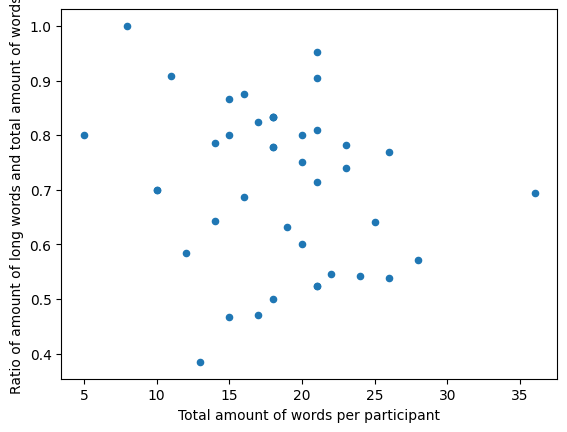

In [45]:
data.plot.scatter('M_count', 'ratio_M')
plt.ylabel('Ratio of amount of long words and total amount of words')
plt.xlabel('Total amount of words per participant')
plt.show()

In [31]:
check = data[['M_count', 'ratio_M']]
check.corr()

,M_count,ratio_M
M_count,1.00000,-0.20018
ratio_M,-0.20018,1.00000


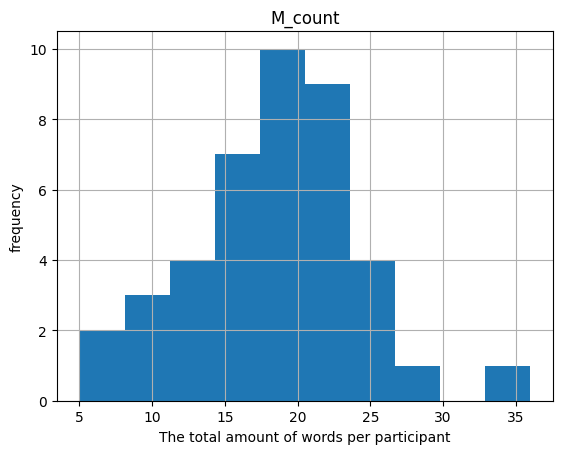

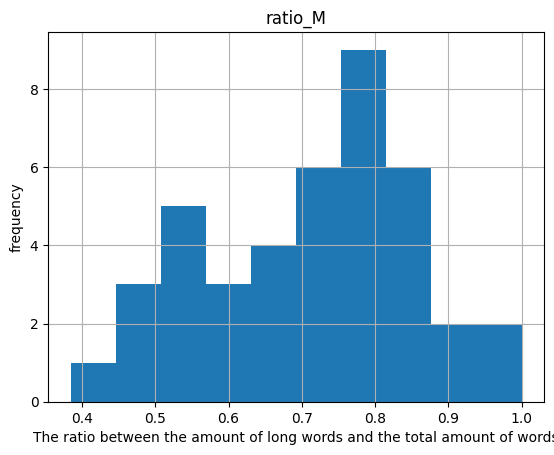

In [39]:
data.hist('M_count')
plt.xlabel('The total amount of words per participant')
plt.ylabel('frequency')
plt.show()


data.hist('ratio_M')
plt.xlabel('The ratio between the amount of long words and the total amount of words')
plt.ylabel('frequency')
plt.show()

In [34]:
age_cat = []

for age in data['age_beh']:
    n = 0
    if age < 30:
        n=0
    if age > 50:
        n=1
    age_cat.append(n)

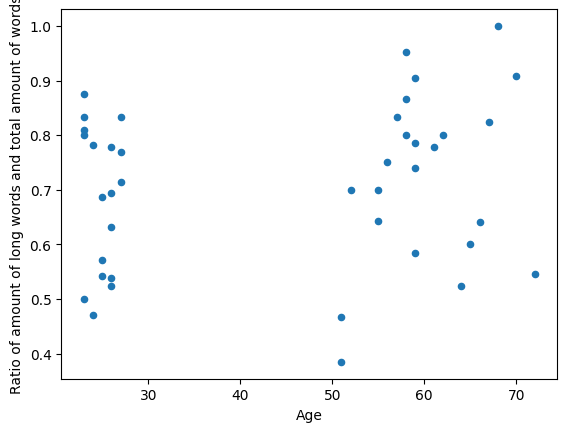

In [41]:
data.plot.scatter('age_beh', 'ratio_M')
plt.xlabel('Age')
plt.ylabel('Ratio of amount of long words and total amount of words')
plt.show()

In [36]:
data.insert(4, "age_cat", age_cat)

In [37]:
y = data['M_count']
x = data[['age_cat', 'ratio_M']]
x = sm.add_constant(x)

model = smf.ols(formula = "M_count ~ age_cat + ratio_M  + age_cat:ratio_M", data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                M_count   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.943
Date:                Fri, 01 Mar 2024   Prob (F-statistic):             0.0155
Time:                        11:50:48   Log-Likelihood:                -123.97
No. Observations:                  41   AIC:                             255.9
Df Residuals:                      37   BIC:                             262.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.8917      6.691     